In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display
from PIL import Image

import os
# check for set environment variable JB_NOSHOW
show = True
if 'JB_NOSHOW' in os.environ:
    show = False

# Basic Example III

## Setup Description

We start out with the simulation setup from [Basic Example I](01_basic_example_i). The goal is to ensure that the desired heat release of the burner was set up in the simulation. We are going to use Python to compare the simulation response with the target, using [JupyterLab](https://jupyter.org/).

FDS creates a couple of files, a very basic one is the `CHID_hrr.csv`. It contains general information of the simulation, for example the released heat, mass and energy losses. This file is a good first stop, to asses if the simulation is setup correctly. 

## Determine the Desired HRR

As mentioned in [Basic Example I](01_basic_example_i), we can use the `HRRPUA` parameter to set up a simple gas burner. In the simulation description it is stated that the burner is to be delivering a heat release rate (HRR) of $\mf 63~kW$. To set up the appropriate `HRRPUA` value we need to divide the HRR by the burning area, i.e. the area that is to be introducing the combustible gas into the domain. According to the description, the burner is a square with an edge length of $\mf 0.4~m$. Thus, we compute the `HRRPUA` value $\mf 63~kW / (0.4~m \times 0.4~m)$ to be about $\mf 393.75~kW/m^2$. 

This seems to be quite straight foward, so what is the need to check it again? The first and obvious part of the answer is: to make sure we didn't make an error in the calculation. Secondly, in FDS all `OBST` and `VENT` need to align with the fluid cell sizes defined in the `MESH`. In cases where the `VENT` would not fit, FDS automatically adjusts their position. Thus, the `VENT` area can change and therefore the amount of combustible gas introduced into the domain.

## Read Simulation Response

From the `CHID_hrr.csv` we are interested in the column with the header label "HRR". Note the structure of the `CHID_hrr.csv` file: the first line contains the units of the data in the respective column, the second line contains the column headers then comes the data. 

There are many different way to read comma separated value (CSV) files in Python. Here the focus is on the Pandas package. 

First, the path to the file needs to be set up. Python provides many different ways to accomplish this. Here we are using the `os` package. With `os.path.join("your", "path", "here")` the labels of files as directories are provided, separated by commas. This builds a path specifically for the operating this script is executed on. This is helpful when sharing scripts between different machines, for example when using Windows on your local workstation but Linux on a remote compute cluster.

Then, the file is read as a `DataFrame`, using Pandas. The package is imported in the beginning of the file: `import pandas as pd`. It provides the method `read_csv()`. This method needs to get the location of the file, here from the variable `hrr_path`. Furthermore, it needs to know which line is to be used as column headers. Since the first line contains the units and the holumn headers are in the second line, we set `header=1` (numbering in Python starts from 0). DataFrames provide some convenience functionalities, for example `head()` and `tail()`. They show the column headers and the first, or last, five lines.

Note: The individual file paths are likely different on your system, depending on your file structure.

Let's read the `CHID_hrr.csv`:

In [12]:
# Set path to file.
hrr_path = os.path.join("data", "Ex1_hrr.csv")
# Read CSV file as Pandas DataFrame.
hrr_df = pd.read_csv(hrr_path, header=1)

# Check result.
hrr_df.head()

,Time,HRR,Q_RADI,Q_CONV,Q_COND,Q_DIFF,Q_PRES,Q_PART,Q_ENTH,Q_TOTAL,MLR_AIR,MLR_PROPANE,MLR_PRODUCTS
0,0.000000,0.000000,-6.802389e-08,4.440892e-19,0.000000,0.000000,0.0,0.0,0.000000,-6.802389e-08,0.0,0.000000,0.0
1,1.033925,83.281562,-1.648879e+01,1.097219e+00,-0.134247,-0.001532,0.0,0.0,22.367290,6.775421e+01,0.0,0.000720,0.0
2,2.013308,78.585038,-2.733659e+01,-6.555959e+00,-0.344925,-0.003698,0.0,0.0,52.008916,4.434387e+01,0.0,0.001246,0.0
3,3.006514,60.888075,-1.466148e+01,-6.623389e+01,-0.335589,-0.004035,0.0,0.0,-21.164841,-2.034691e+01,0.0,0.001361,0.0
4,4.011369,62.306540,-1.485718e+01,-4.732209e+01,-0.362806,-0.004093,0.0,0.0,-0.429241,-2.396315e-01,0.0,0.001379,0.0


With the DataFrames one can access the individual columns by their labels, using for example `hrr_df["Time"]`. If the header of a column is a continous string, i.e. no spaces, one can also access the column directly using the dot-notation: `hrr_df.HRR`. Both are demonstrated in the plot below.

Using `list(DataFrame)`, one gets a list with the column headers in order from left to right:

In [13]:
# Overview of the header labels.
list(hrr_df)

['Time',
 'HRR',
 'Q_RADI',
 'Q_CONV',
 'Q_COND',
 'Q_DIFF',
 'Q_PRES',
 'Q_PART',
 'Q_ENTH',
 'Q_TOTAL',
 'MLR_AIR',
 'MLR_PROPANE',
 'MLR_PRODUCTS']

## Compare Response to Target

To compare if the target value was reached, we simply plot the HRR development over time. As a visual aid, we also plot a dashed line representing the target values.

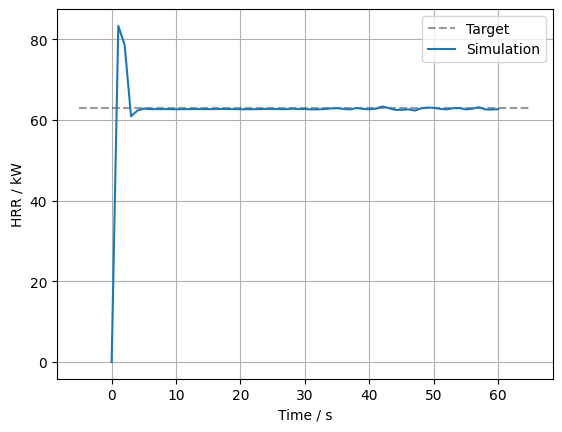

In [11]:
# Plot target.
plt.plot([-5, 65],
         [63, 63],
         color="k", alpha=0.4,
         linestyle="--",
         label="Target")

# Plot sim response.
plt.plot(hrr_df["Time"], 
         hrr_df.HRR,
         label="Simulation")


# Plot meta data.
plt.xlabel("Time / s")
plt.ylabel("HRR / kW")
plt.legend()
plt.grid()

## Notes on fdsreader

The fdsreader Pyhton module also reads the `CHID_hrr.csv` and `CHID_devc.csv` files. Thus, all the simulation data is conveniently accessible from the same loaction. However, it is worth it to look into how one could read CSV files in general. For example, when simulation results are to be compared against some experiment data. This external data is not available from the within the fdsreader, obviously. Please refer to the [fdsreader section](../../tools/03_analysis/02_fdsreader) for more information.